In [1]:
from utils.realism_helper import *
from utils.get_circuit_discovery_scores import get_realism_scores


def get_all_algos_scores(weights, mean):
    acdc_realism = get_realism_scores(weight=weights, algorithm='acdc')
    acdc_best = get_best_score(acdc_realism, mean)

    node_sp_realism = get_realism_scores(weight=weights, algorithm='node_sp')
    node_sp_best = get_best_score(node_sp_realism, mean)

    edge_sp_realism = get_realism_scores(weight=weights, algorithm='edge_sp')
    edge_sp_best = get_best_score(edge_sp_realism, mean)

    return acdc_best, node_sp_best, edge_sp_best



In [2]:
acdc_510_best, node_sp_510_best, edge_sp_510_best = get_all_algos_scores(weights="510", mean=False)
acdc_tracr_best, node_sp_tracr_best, edge_sp_tracr_best = get_all_algos_scores(weights="tracr", mean=False)
acdc_100_best, node_sp_100_best, edge_sp_100_best = get_all_algos_scores(weights="100", mean=False)

/Users/cybershiptrooper/src/interpretability/MATS/circuits-benchmark/notebooks/utils/get_circuit_discovery_scores.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([
/Users/cybershiptrooper/src/interpretability/MATS/circuits-benchmark/notebooks/utils/get_circuit_discovery_scores.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([
/Users/cybershiptrooper/src/interpretability/MATS/circuits-benchmark/notebooks/utils/get_circuit_discovery_scores.py:24: FutureW

In [3]:
make_combined_realism_df_from_list([
    acdc_510_best, node_sp_510_best, edge_sp_510_best
], ["acdc", "node_sp", "edge_sp"])

,run,acdc,node_sp,edge_sp
0,11,0.474224,0.436851,0.451716
1,13,0.492938,0.492940,0.492940
2,21,0.590546,0.400278,0.540264
3,24,0.590546,0.400278,0.540264
4,3,0.307617,0.307617,0.307617
5,8,0.269310,0.249977,0.225510


Text(0.5, 1.0, 'Realism Scores for Weight tracr')

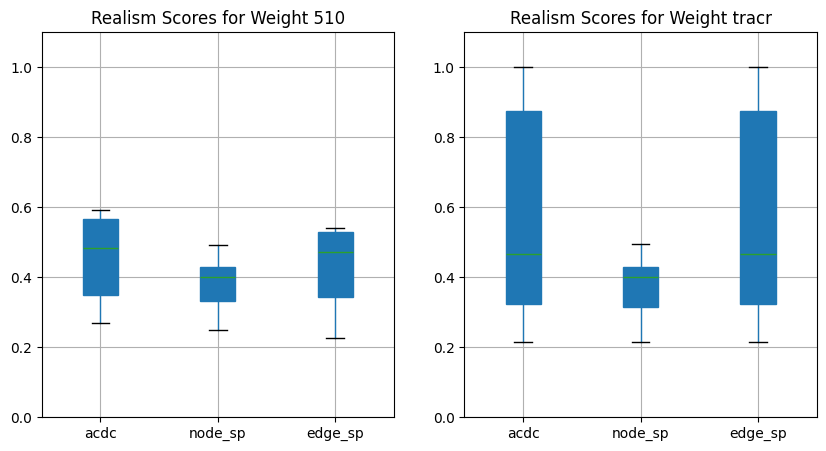

In [10]:
combined_510 = make_combined_realism_df_from_list([
    acdc_510_best, node_sp_510_best, edge_sp_510_best
], ["acdc", "node_sp", "edge_sp"])

combined_tracr = make_combined_realism_df_from_list([
    acdc_tracr_best, node_sp_tracr_best, edge_sp_tracr_best
], ["acdc", "node_sp", "edge_sp"])

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

combined_510.boxplot(ax=ax[0],
                    column=["acdc", "node_sp", "edge_sp"],
                    patch_artist=True,
                    showfliers=True,
                    # whis=[5, 95],
                    )

combined_tracr.boxplot(ax=ax[1],
                    column=["acdc", "node_sp", "edge_sp"],
                    patch_artist=True,
                    showfliers=True,
                    # whis=[5, 95],
                    )

# make y axis range 0-1 for both plots
ax[0].set_ylim(0, 1.1)
ax[1].set_ylim(0, 1.1)

ax[0].set_title("Realism Scores for Weight 510")
ax[1].set_title("Realism Scores for Weight tracr")

Text(0.5, 1.0, 'ACDC Realism Scores')

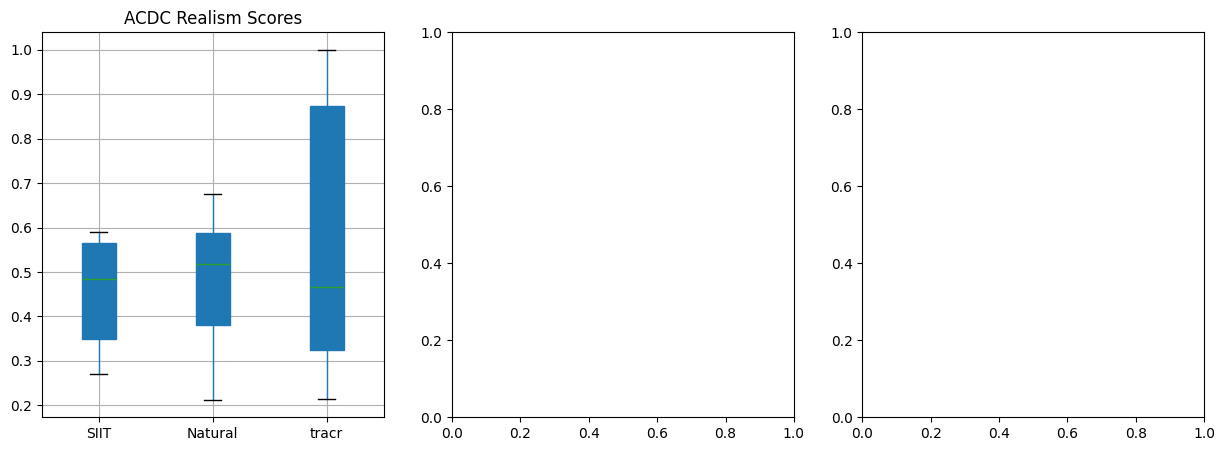

In [8]:
acdc_combined = make_combined_realism_df_from_list(
    [acdc_510_best, acdc_100_best, acdc_tracr_best],
    ["SIIT", "Natural", "tracr"]
)

# node_sp_combined = make_combined_realism_df_from_list(
#     [node_sp_510_best, node_sp_100_best, node_sp_tracr_best],
#     ["SIIT", "Natural", "tracr"]
# )

# edge_sp_combined = make_combined_realism_df_from_list(
#     [edge_sp_510_best, edge_sp_100_best, edge_sp_tracr_best],
#     ["SIIT", "Natural", "tracr"]
# )

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

acdc_combined.boxplot(ax=ax[0],
                    column=["SIIT", "Natural", "tracr"],
                    patch_artist=True,
                    showfliers=True,
                    # whis=[5, 95],
                    )

# node_sp_combined.boxplot(ax=ax[1],
#                     column=["SIIT", "Natural", "tracr"],
#                     patch_artist=True,
#                     showfliers=True,
#                     # whis=[5, 95],
#                     )

# edge_sp_combined.boxplot(ax=ax[2],
#                     column=["SIIT", "Natural", "tracr"],
#                     patch_artist=True,
#                     showfliers=True,
#                     # whis=[5, 95],
#                     )

ax[0].set_title("ACDC Realism Scores")
# ax[1].set_title("Node SP Realism Scores")
# ax[2].set_title("Edge SP Realism Scores")


